Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

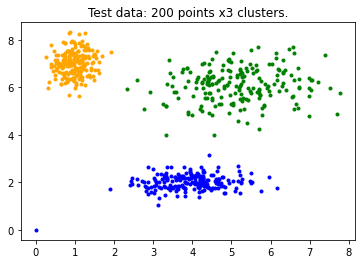

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

### Set up data

The below cell reads in the data, and defines a function which finds the min/max intervals for a given feature. This will be used later to compute the fuzzy membership function.

In [37]:
df_wine = pd.read_csv('wine_clean.csv')

def get_intervals(feature_interval, no_intervals):
    max_interval = max(feature_interval)
    min_interval = min(feature_interval)
    step = (max_interval - min_interval) / no_intervals
    interval_list = [min_interval + step * i for i in range(no_intervals)]
    return interval_list

feature_intervals = get_intervals(df_wine['Color intensity'], 5)
print(feature_intervals)

[1.28, 4.21, 7.140000000000001, 10.07]


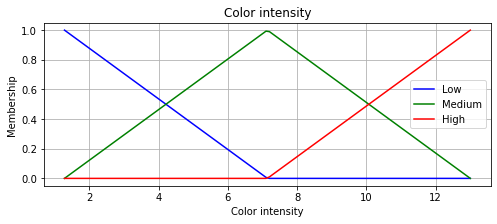

In [56]:
def get_fuzzy_boundaries(intervals,data):
    low = [min(data), min(data), intervals[2]]
    med = [min(data), intervals[2], max(data)]
    high = [intervals[2], max(data), max(data)]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, df_wine['Color intensity'])
df_wine.sort_values(['Color intensity'], inplace=True)

qual_lo = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[0])
qual_md = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[1])
qual_high = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(df_wine['Color intensity'].values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(df_wine['Color intensity'].values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(df_wine['Color intensity'].values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Color intensity')
ax0.legend()
ax0.grid()
plt.ylabel('Membership')
plt.xlabel('Color intensity')
plt.show()

### Fuzzy Membership Function, Triangular

This function will give a membership value (between 0 and 1) based on scores provided, scores can be in multiple sets at the same time.

11 11


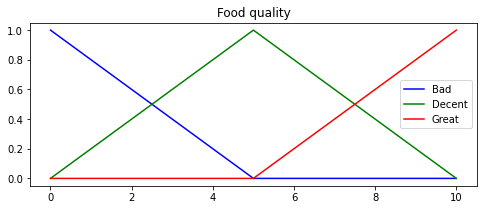

In [30]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))
print(len(x_qual),len(qual_lo))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
plt.show()

### Membership Function, Trapezoidal

Get a membership value (between 0 and 1) for the 3 classes for temperature, some temperatures can be between two, such as cold and medium temperature for instance, so fuzzy lets us represent that by having some values being in two sets

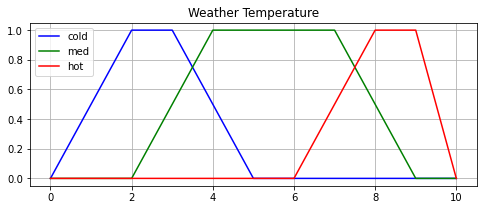

In [22]:
x_qual = np.arange(0, 11, 1)
qual_lo = fuzz.trapmf(x_qual, [0, 2, 3, 5])
qual_md = fuzz.trapmf(x_qual, [2, 4, 7, 9])
qual_hi = fuzz.trapmf(x_qual, [6, 8, 9, 10])
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='cold')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='med')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='hot')
ax0.set_title('Weather Temperature')
ax0.set_axisbelow(True)
ax0.grid()
ax0.legend()
plt.show()